# Analyze A/B Test Results 


<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


<a id='probability'></a>
## Part I - Probability


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### 1.1


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [4]:
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [5]:
df.shape[0]

294478

**c.** The number of unique users in the dataset.

In [8]:
df['user_id'].nunique()

290584

**d.** The proportion of users converted.

In [9]:
df2= df.drop_duplicates(subset=["user_id"])
df2.shape[0]

290584

In [10]:
converted_usrs= df2.query(" converted == 1").shape[0]
df2.shape[0]

290584

In [11]:
converted_usrs/df2.shape[0]

0.1195695564793657

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [12]:
df.query("group == 'treatment' and landing_page != 'new_page'").shape[0]

1965

**f.** Do any of the rows have missing values?

In [13]:
df.isnull().sum().sum()

0

### 1.2  

Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
t_bad= df.query("group == 'treatment' and landing_page != 'new_page'").shape[0]
c_bad= df.query("group == 'control' and landing_page != 'old_page'").shape[0]
df2= df.query("(group == 'treatment' and landing_page == 'new_page') or (group == 'control' and landing_page == 'old_page')")
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [15]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [16]:
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2[df2.duplicated(subset= 'user_id') == True]['user_id']

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [15]:
df2[df2.duplicated(subset= 'user_id', keep= False) == True]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [16]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2= df2.drop([2893])
# Check again if the row with a duplicate user_id is deleted or not
df2[df2.duplicated(subset= 'user_id') == True]

,user_id,timestamp,group,landing_page,converted


### 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [17]:
P_population= df2[df2['converted'] == 1].shape[0] / df2.shape[0]
print(P_population)

0.11959708724499628


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
P_conv_cntrl = df2.query("converted == 1 and group == 'control'").shape[0] / df2[df2['group'] == 'control'].shape[0]
print(P_conv_cntrl)

0.1203863045004612


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
P_conv_treat= df2.query("converted == 1 and group == 'treatment'").shape[0] / df2[df2['group'] == 'treatment'].shape[0]
print(P_conv_treat)

0.11880806551510564


In [20]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff= P_conv_cntrl - P_conv_treat
print(obs_diff)

0.0015782389853555567


**d.** What is the probability that an individual received the new page?

In [21]:
df2[df2['landing_page'] == 'new_page'].shape[0] / df2.shape[0]

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**The treatment group users didnt lead into more conversions, the rate of conversion was 0.1188 for the treatment group while being 0.1204 for the control group**

<a id='ab_test'></a>
## Part II - A/B Test


### 2.1
For now, consider you need to make the decision just based on all the data provided.  


If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

$$H_0: p_{old} - p_{new} \geq 0$$
$$H_1: p_{old} - p_{new} < 0$$

### 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>


Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [22]:
p_new= P_population
print(p_new)

0.11959708724499628


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [23]:
p_old= P_population
print(p_old)

0.11959708724499628


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br>

In [24]:
n_new= df2[df2['group'] == 'treatment'].shape[0]
print(n_new)

145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old= df2[df2['group'] == 'control'].shape[0]
print(n_old)

145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [26]:
# Simulate a Sample for the treatment Group
new_page_converted= np.random.choice([0,1], size=n_new, p= [1-p_new, p_new])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [27]:
# Simulate a Sample for the control Group
old_page_converted= np.random.choice([0,1], size=n_old, p= [1-p_old, p_old])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [28]:
p_diff= new_page_converted.mean() - old_page_converted.mean()
print(p_diff)

-0.00016053073113943273



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [50]:
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new 
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old 
p_diffs = new_converted_simulation - old_converted_simulation

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.

Text(0, 0.5, 'Frequency')

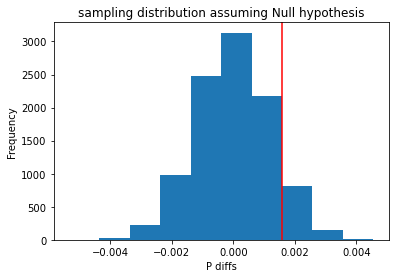

In [51]:
plt.hist(p_diffs)
plt.axvline(x= obs_diff, color='red')
plt.title('sampling distribution assuming Null hypothesis')
plt.xlabel('P diffs')
plt.ylabel('Frequency')
# The graph is expected to follow a normal distribution

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [52]:
p_diffs= np.array(p_diffs)

In [53]:
(p_diffs < obs_diff).mean()

0.902

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**The value which I have finally calculated is called P value.
This value can be used to indicate if the alternative hypothesis is statistically significant or not, if the P value is turned out to be much higher than the Type I error rate (0.05) we won't be able then to reject the Null Hypothesis.
In our case the P value is equal to 0.902 which is much higher than 0.05, which means that we can't reject the Null hypothesis.<br><br>
The owner of the website is adviced to keep the old page and dont move to the new page as it won't increase the number of converted users, counterwise it could even decrease it.**



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [33]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.query("landing_page == 'old_page' and converted == 1").shape[0]

# number of conversions with the new_page
convert_new = df2.query("landing_page == 'new_page' and converted == 1").shape[0]

# number of individuals who were shown the old_page
n_old = df2[df2['landing_page'] == 'old_page'].shape[0]

# number of individuals who received new_page
n_new = df2[df2['landing_page'] == 'new_page'].shape[0]

In [34]:
print(convert_old)
print(convert_new)
print(n_old)
print(n_new)

17489
17264
145274
145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.

In [35]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest(count=[convert_old, convert_new], nobs=[n_old, n_new], alternative= 'smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**The obtained z-score is 1.31, as the alternative is one-tailed the z-score should be greater than 1.645 in order to reject the null hypothesis which is not the case here.<br>
The obtained p-value is 0.905 which is very close to the one obtained in {j}= 0.902 which also suggest holding down the null hypothesis.<br><br>
The owner of the website is adviced to keep the old page and dont move to the new page as it won't increase the number of converted users, counterwise it could even decrease it.**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Logistic regression makes more sense here as we only care about classifing the labels into only two possible outcomes or categories (converted or not converted)**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [36]:
df2['intercept']= 1
df2[['no_ab_page', 'ab_page']] = pd.get_dummies(df['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,no_ab_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [37]:
df2= df2.drop('no_ab_page', axis= 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [38]:
logit_mod= sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results= logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 21 Dec 2022   Pseudo R-squ.:               8.077e-06
Time:                        21:52:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>

>**The p-value associated with ab_page is 0.190 (> 0.05 Type I error) which means that we can't reject the null-hypothesis.<br>
The p-value differs from the p-value obtained in Part II as the hpotheses for the logistic regression is defined differently:**
$$H_0: p_{old} - p_{new} = 0$$
$$H_1: p_{old} - p_{new} != 0$$

>**Which also means that it is a two-sided hypothesis, unlike the one-sided hypotheses in Part II.**

>**Finally, The owner of the website is adviced to keep the old page and dont move to the new page as it won't increase the number of converted users, counterwise it could even decrease it.**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Adding more variables from the table like the _landing_page_ will not lead into any enhancement as the _landing_page_ variable is dependent on the _group_ variable which is already used in terms of the _ab_page_ variable this is known as _multicoliniarity_, but maybe adding another independent variables to the table while including them into the fitting of the regression model will definetely increase the accuracy of our decision.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


 Provide the statistical output as well as a written response to answer this question.

In [40]:
# Read the countries.csv
df3= pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
# Join with the df2 dataframe
df_merged= df2.set_index('user_id').join(df3.set_index('user_id'))
df_merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [42]:
df_merged['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [43]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']]= pd.get_dummies(df_merged['country'])
df_merged= df_merged.drop('UK', axis=1)
df_merged.head(10)

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,US
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1
936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0
719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,1
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,0


In [44]:
# Fit your model, and summarize the results
logit_mod2= sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US', 'CA']])
results2= logit_mod2.fit()
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2022-12-21 22:21 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
==================================================================

"""

>Adding the new columns has increased our confidence in terms of p-values, as their p-values also suggested to stay with the null hypothesis (all p-values are > 0.05).<br>
The problem appeared here is the the R-Squared value decreased even more to be 0.0 which can be considered as a flag for the existance of a multicoliniarity problem!<br>

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results.

In [46]:
df_merged['ab_US']= df_merged['ab_page'] * df_merged['US']
df_merged['ab_CA']= df_merged['ab_page'] * df_merged['CA']

df_merged.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,US,ab_US,ab_CA
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,1,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,1,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0,0


In [48]:
logit_mod3= sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'US', 'CA','ab_US', 'ab_CA']])
results3= logit_mod3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 21 Dec 2022   Pseudo R-squ.:               3.482e-05
Time:                        22:47:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
US             0.0057      0.019      0.306      0.760      -0.031       0.043
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
ab_US         -0.0314      0.027     -1.181      0.238      -0.084       0.021
ab_CA         -0.0783      0.057     -1.378      0.168      -0.190       0.033
==============================================================================
"""

In [49]:
np.exp(0.0108), np.exp(0.0057), 1/np.exp(-0.0118), 1/np.exp(-0.0314), 1/np.exp(-0.0783)

(1.010858530520097,
 1.0057162759095335,
 1.011869894648401,
 1.0318981806179213,
 1.0814470441230692)

>The Coefficient can be interpreted as follows:<br>
1- If a user from the treatment group is selected, s/he is 1.0108 more likely to be converted than if s/he belongs to the control group.<br>
2- If a user from US is selected, s/he is 1.006 more likely to be converted than if s/he is from UK.<br>
3- If a user from CA is selected, s/he is 1.0119 less likely to be converted than if s/he is from UK.<br>
<br>
All p-values are greater than 0.05 which means that we can't reject the null hypothesis.<br><br>
The gained advantage from adding the interaction coefficient is the increase in the R-Squared value which can increase or confidence in our obtained coefficeints and p-values.

>**Finally, The owner of the website is adviced to keep the old page and dont move to the new page as it won't increase the number of converted users, counterwise it could even decrease it.**

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])